In [6]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#basic checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#handle objective datatype
data.describe()
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


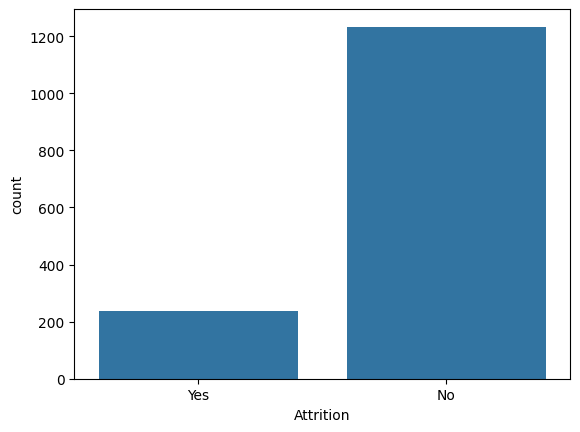

In [10]:
#target column is attrition
sns.countplot(x=data.Attrition)
plt.show()
#analysis for employees who wants to leave company(yes), who dont want to leave(no)

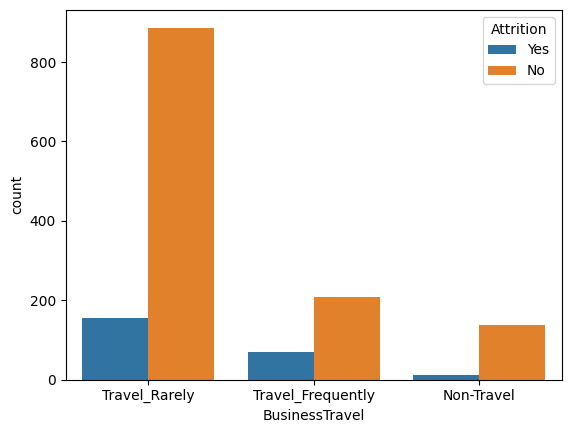

In [11]:
#so this is imbalanced data, so balance data of target (attrition)
#we'll see how business travel is affecting on attrition
sns.countplot(x=data.BusinessTravel,hue=data.Attrition)
plt.show()
#we can conclude that travel rarely and travel frequently is reason that
#people may leave their job

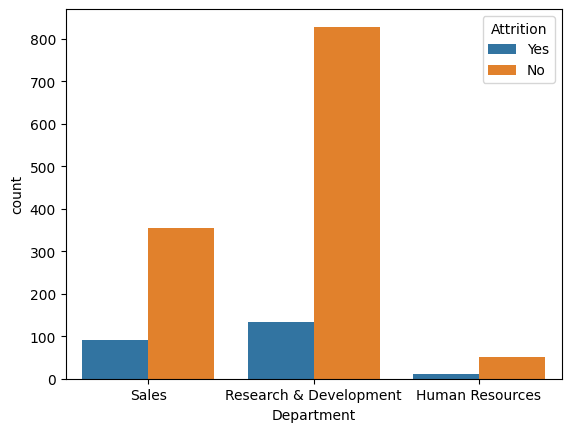

In [12]:
#impact of department on attrition
sns.countplot(x=data.Department,hue=data.Attrition)
plt.show()
#here we can conclude that r&d is more impacting on attrition compared to sales or HR

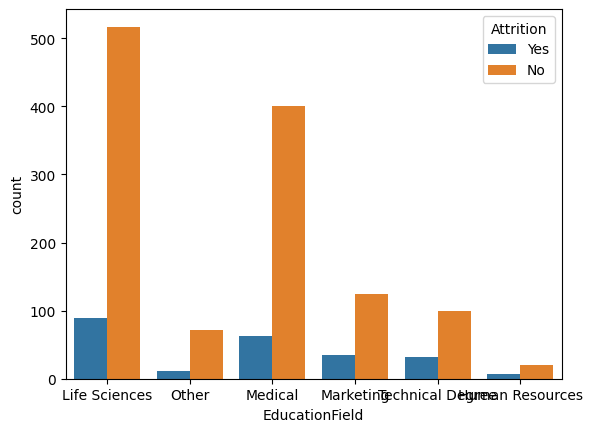

In [13]:
#impact of education field on attrition
sns.countplot(x=data.EducationField,hue=data.Attrition)
plt.show()
#people from life sciences have more attrition and least is in human resources

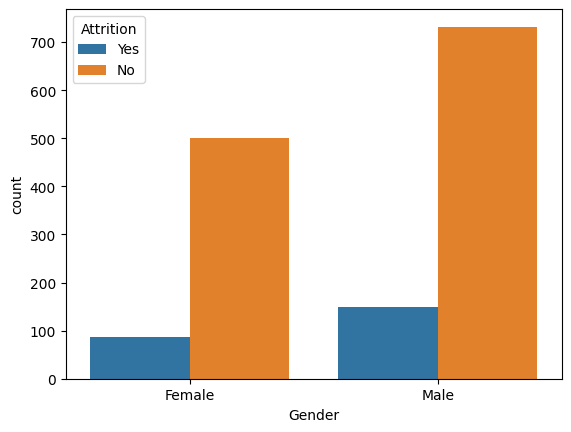

In [14]:
#impact of gender on attrition
sns.countplot(x=data.Gender,hue=data.Attrition)
plt.show()
#here we can observe that male employees tend to leave the company more than female, males are having more attrition than females

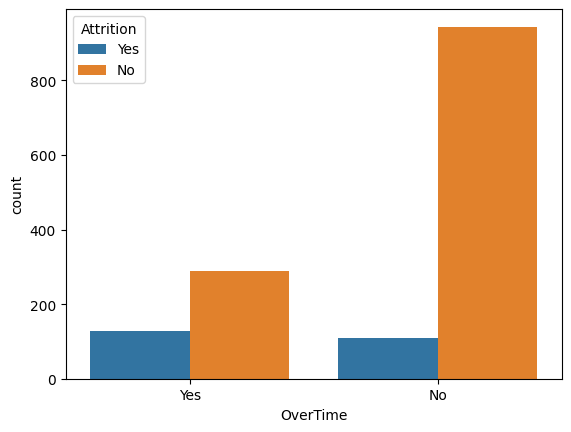

In [15]:
#impact of overtime on attrition
sns.countplot(x=data.OverTime,hue=data.Attrition)
plt.show()
#overtime is affecting attrition, since overtime is more, attrition is about to increase, less number of employees are doing overtime

<function matplotlib.pyplot.show(close=None, block=None)>

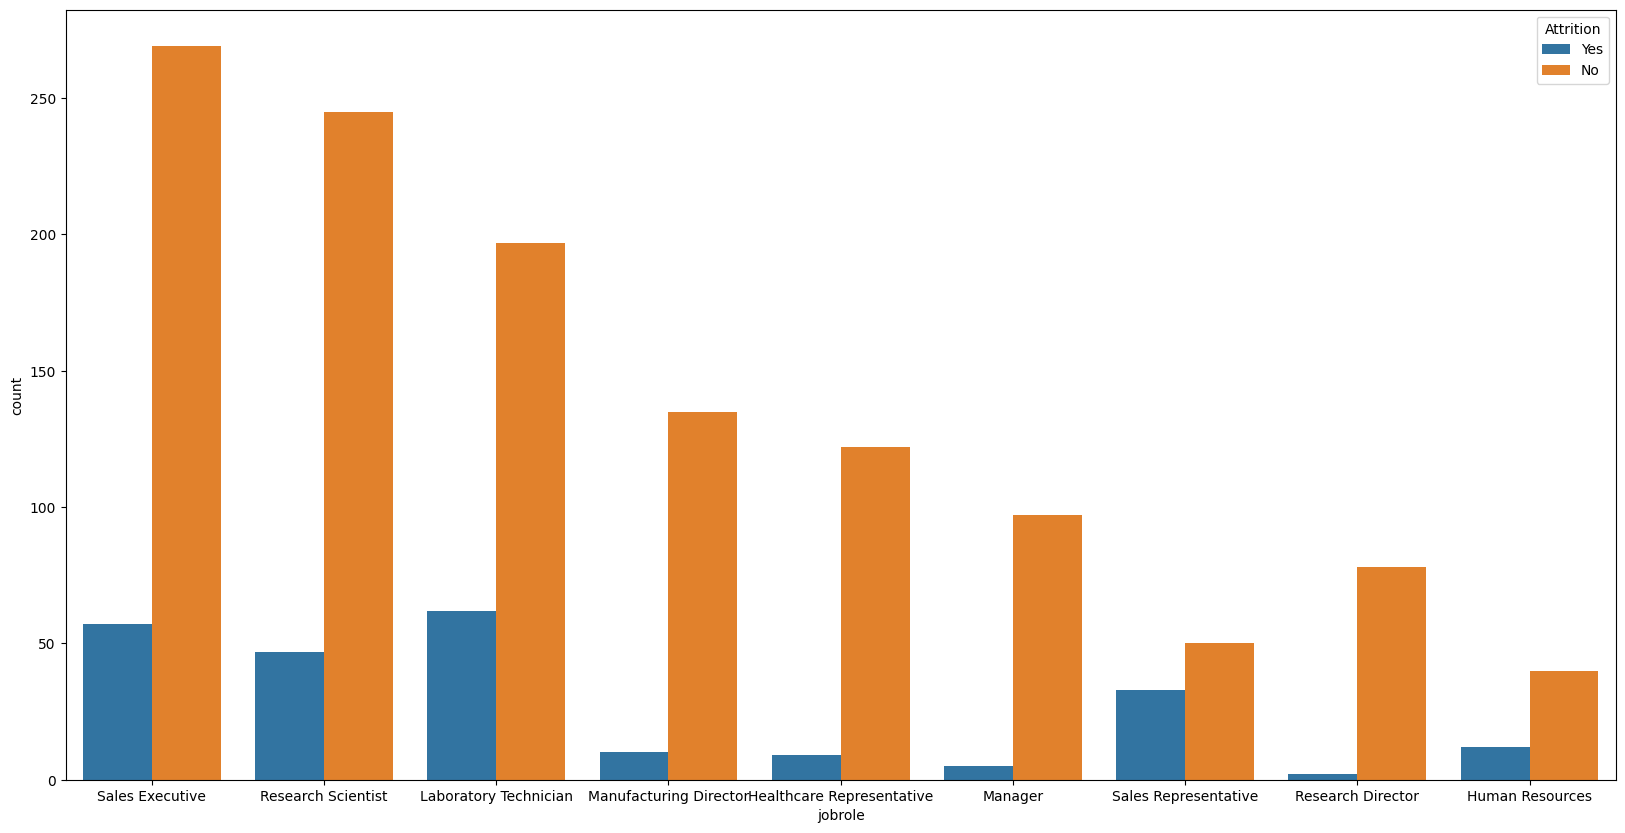

In [16]:
#impact of job role on attrition
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole',hue='Attrition',data=data)
plt.xlabel('jobrole',fontsize=10)
plt.show
#sales exec, sales rep, lab tech are having more chances of attrition, research directors are having least

In [17]:
#analysis on continuous data with respect to attrition or analysis of columns having continuous data type
obj_col = []
for columns in data.columns:
  if data[columns].dtype != int: #for continuous features, >=10 is used
    obj_col.append(columns)
print(obj_col)
#below is list of columns with data type not int

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [19]:
#data pre processing, to handle object data type. we convert objective data type to integer
data.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [20]:
#categorical data handling
data.Attrition=data.Attrition.map({'Yes':1,'No':0})

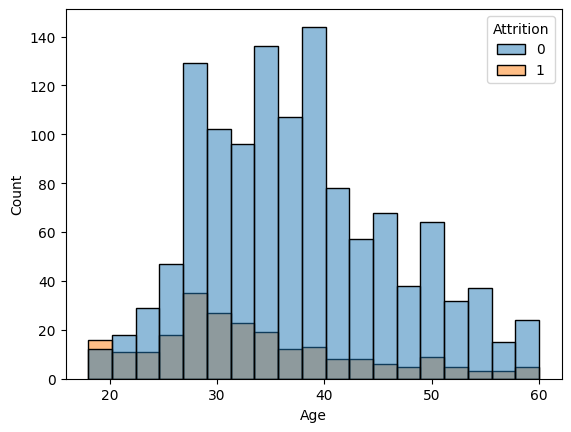

In [22]:
#impact of age on attrition
sns.histplot(hue=data.Attrition,x=data.Age)
plt.show()
#advantage of data analytics
#make decisions at your business's speed
#increase business optimization
#quickly detect and address operational issues
#improve customer service with up to date info

In [23]:
data.Attrition=data.BusinessTravel.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})
#since travel rarely has more data it is marked 2, check which is having least data, mark it as 0, frequently is moderate so 1

In [24]:
data.Attrition=data.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})

In [25]:
data.attrition=data.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical':2,'Other':1,'Human resources':0})


In [26]:
data.Attrition=data.Gender.map({'Male':1,'Female':0})

In [27]:
#Feature selection: here we will see which columns are important and we'll keep them and then we will drop unnecessary columns
#data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
#print(data.columns)
# Verify existing columns before dropping
print(data.columns)
#no extra unique columns found

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
#model creation
x=data.drop("Attrition",axis=1)  #independent data
y=data["Attrition"]  #dependent data

In [30]:
#balancing target column using smote
!pip install imblearn


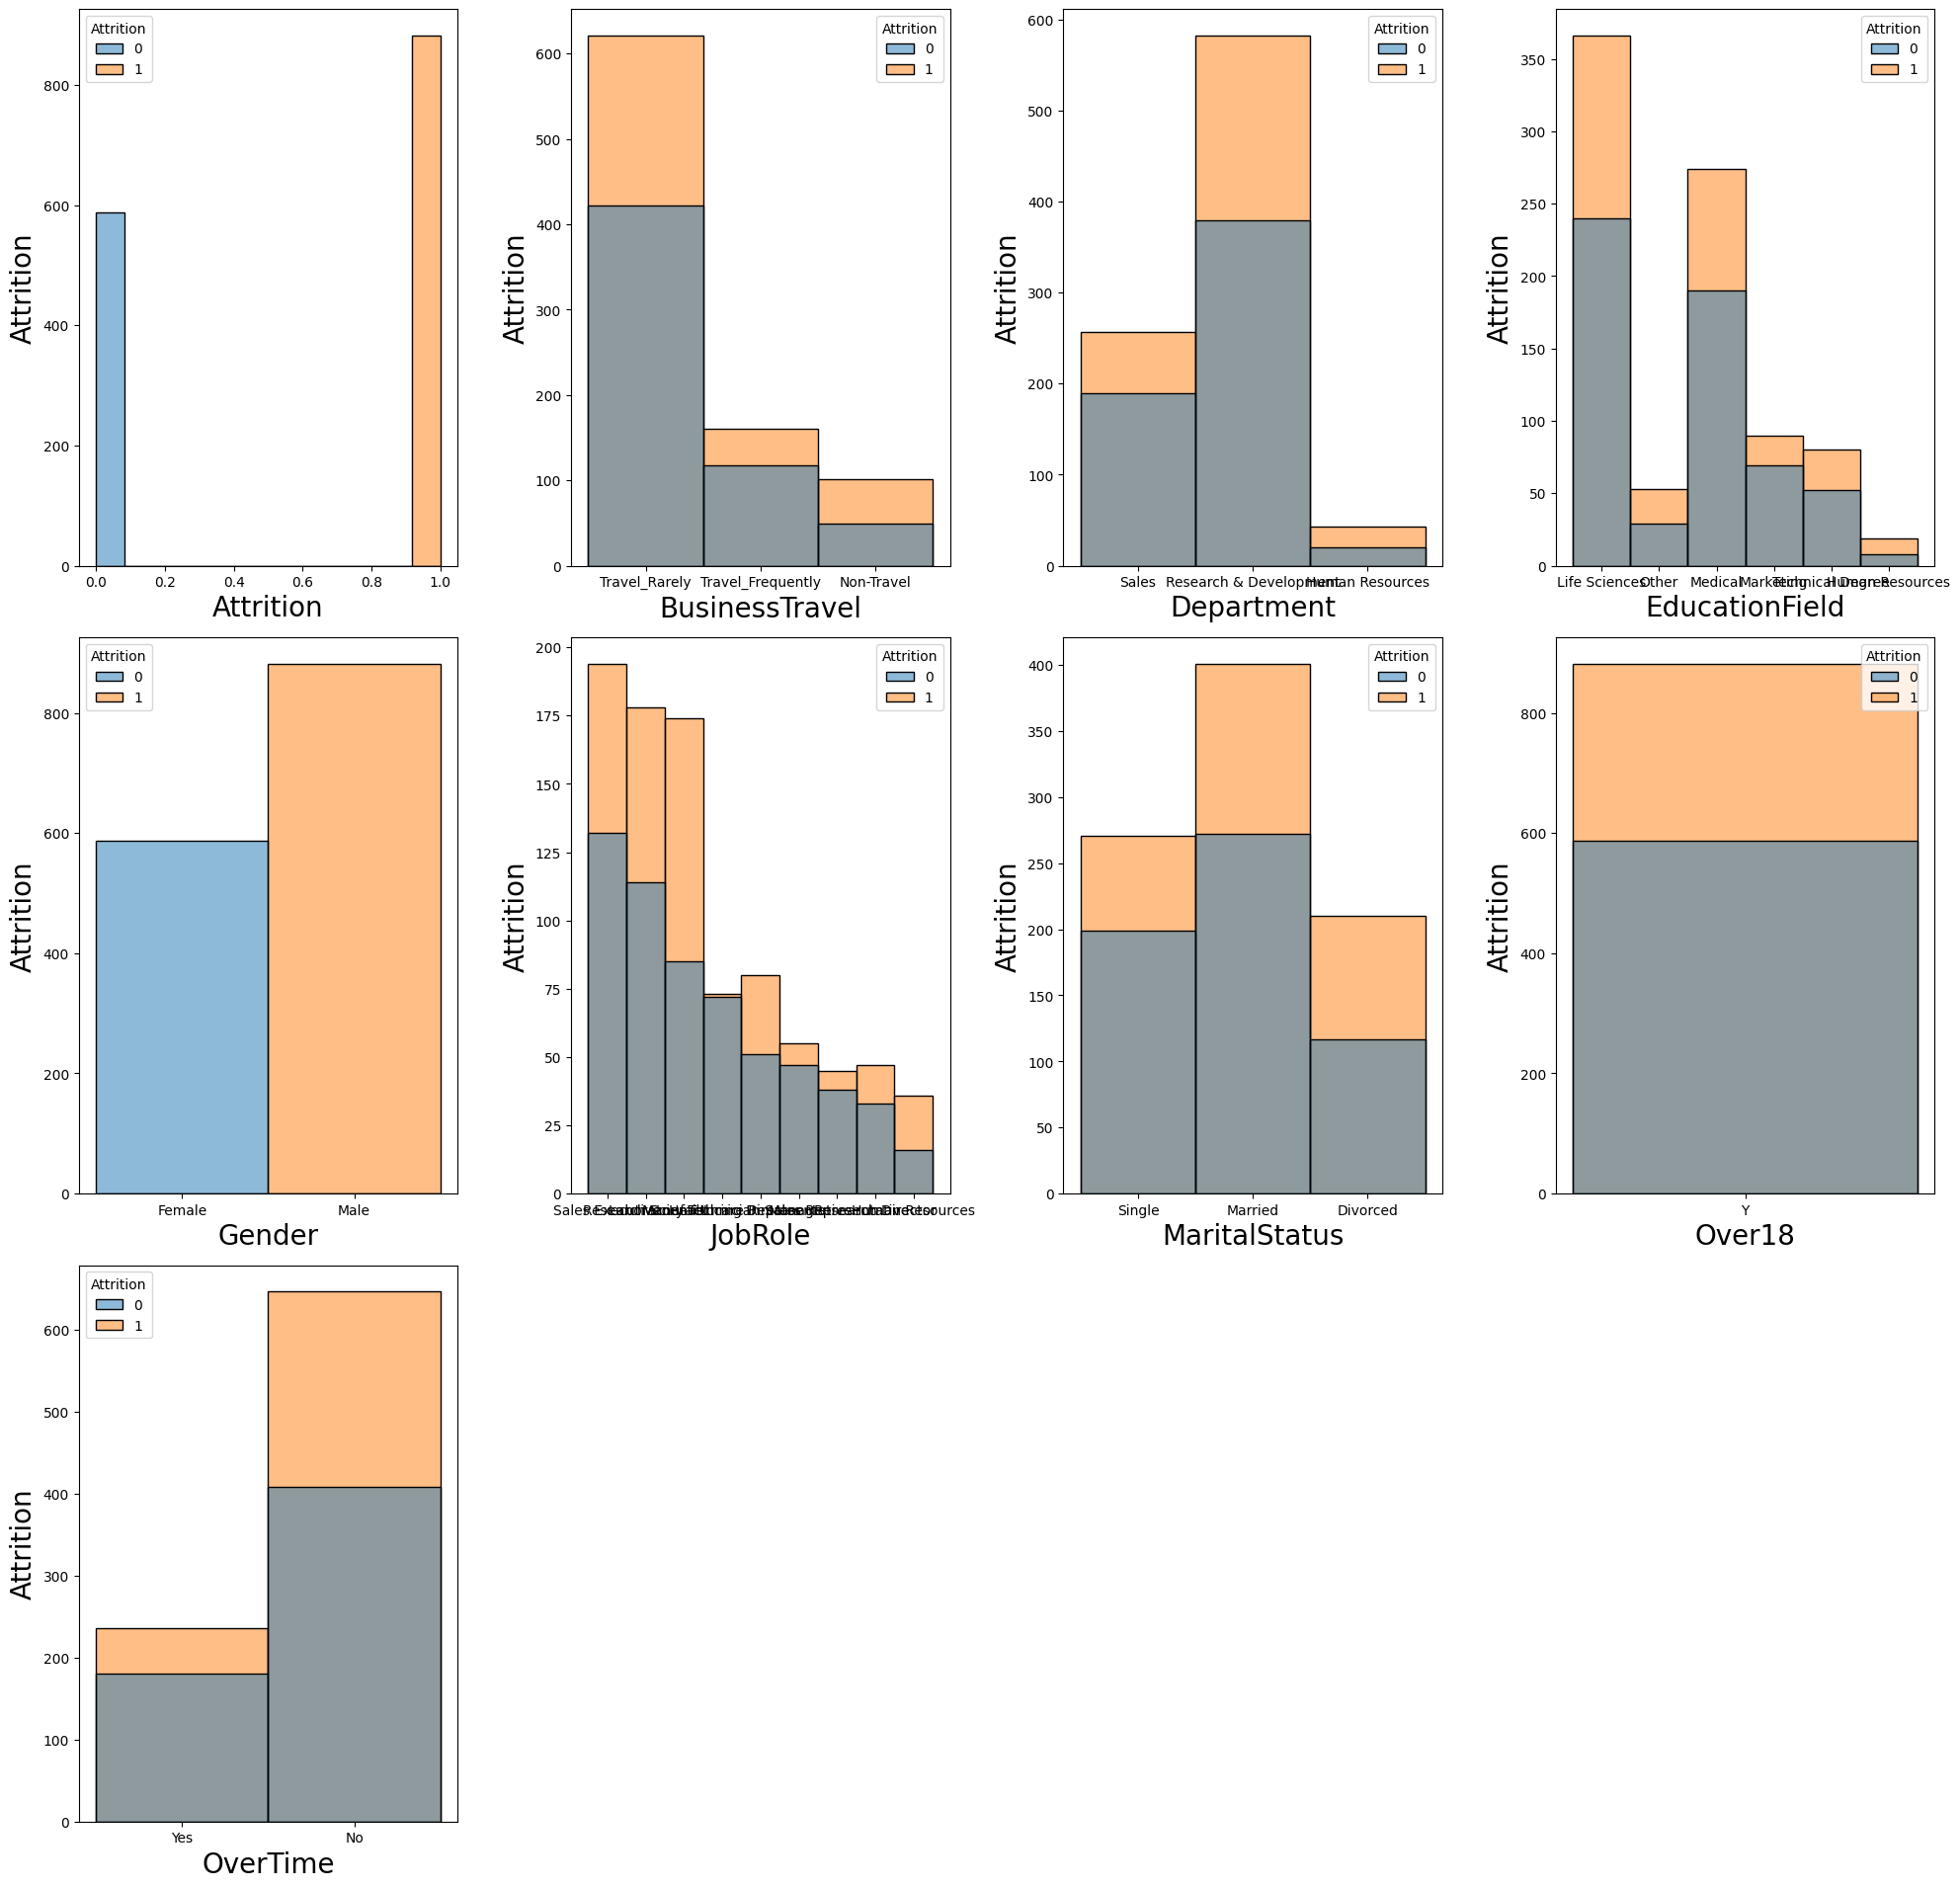

In [32]:
#next method for visualization
plt.figure(figsize=(20,25), facecolor='white')
pltnumber=1

for col in obj_col: # Iterate directly over column names
  if pltnumber<=16 :
    ax = plt.subplot(4,4,pltnumber)
    sns.histplot(x=data[col].dropna(),hue=data.Attrition) # Access column data using data[col]
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Attrition',fontsize=20)
  pltnumber+=1
plt.tight_layout()
#this is effective way of visualisation, instead of typing single line, all dataset in one code